#   ILLINOIS HOME OWNERSHIP

![](https://images.unsplash.com/photo-1628133287836-40bd5453bed1?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80)
</br>
[Photo Taken By: Ian MacDonald](https://unsplash.com/@imacdonald3)

The goal of this analysis is to understand the population of Illinois's relationship to home ownership. To see how income, and race affect home ownership.

## Import Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

## Ingest Data

In [ ]:
datasets = [
    'HomeownershipRates_Age_Race_Ethnicity.xlsx',
    'HomeownerComp_Age_Race_Ethnicity.xlsx',
    'Income by Location.csv'
    ]

In [ ]:
rates = pd.read_excel('HomeownershipRates_Age_Race_Ethnicity.xlsx', header=1)
comp = pd.read_excel('HomeownerComp_Age_Race_Ethnicity.xlsx', header=1)
income_location = pd.read_csv('Income by Location.csv', header=0)

In [ ]:
rates.head()

,Age,1990,2000,2010,2018,2020
0,15-24,16.9,17.9,16.1,14.6,15.0
1,25-34,46.4,45.6,42.0,38.4,39.2
2,35-44,67.4,66.2,62.3,57.8,59.2
3,45-54,76.3,74.9,71.5,68.7,69.4
4,55-64,80.6,79.8,77.3,74.9,74.8


In [ ]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     8 non-null      object 
 1   1990    8 non-null      float64
 2   2000    8 non-null      float64
 3   2010    8 non-null      float64
 4   2018    8 non-null      float64
 5   2020    8 non-null      float64
dtypes: float64(5), object(1)
memory usage: 512.0+ bytes


In [ ]:
comp.head()

,Age,1990,2000,2010,2018,2020
0,15-24,803,990,870,641,928
1,25-34,9224,8336,7547,7036,1454
2,35-44,13707,15867,13256,12072,12501
3,45-54,10993,15957,17804,15253,14912
4,55-64,9971,11367,16503,17858,17998


In [ ]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     8 non-null      object
 1   1990    8 non-null      int64 
 2   2000    8 non-null      int64 
 3   2010    8 non-null      int64 
 4   2018    8 non-null      int64 
 5   2020    8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 512.0+ bytes


In [ ]:
income_location.head()

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography
0,2020,2020,0,Total,42891,22191.0,"Census Tract 101, Cook County, IL",14000US17031010100
1,2020,2020,0,Total,39955,23269.0,"Census Tract 102.01, Cook County, IL",14000US17031010201
2,2020,2020,0,Total,43839,6338.0,"Census Tract 102.02, Cook County, IL",14000US17031010202
3,2020,2020,0,Total,44375,16139.0,"Census Tract 103, Cook County, IL",14000US17031010300
4,2020,2020,0,Total,37198,8616.0,"Census Tract 104, Cook County, IL",14000US17031010400


In [ ]:
income_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Year                       6380 non-null   int64  
 1   Year                          6380 non-null   int64  
 2   ID Race                       6380 non-null   int64  
 3   Race                          6380 non-null   object 
 4   Household Income by Race      6380 non-null   int64  
 5   Household Income by Race Moe  6380 non-null   float64
 6   Geography                     6380 non-null   object 
 7   ID Geography                  6380 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 398.9+ KB


## EDA

In [ ]:
def plot_hist_box(dataframe, column):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=dataframe, x=column, bins=10, alpha=0.5)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=dataframe, x=column)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.show()

In [ ]:
comp = pd.melt(comp, id_vars=["Age"], var_name="Year", value_name="Composition")
comp['Year'] = comp['Year'].astype(int)
comp['Race'] = "Total" 
comp.head()

,Age,Year,Composition,Race
0,15-24,1990,803,Total
1,25-34,1990,9224,Total
2,35-44,1990,13707,Total
3,45-54,1990,10993,Total
4,55-64,1990,9971,Total


In [ ]:
comp.describe()

,Year,Composition
count,40.00000,40.000000
mean,2007.60000,8950.675000
std,11.41479,5728.504501
min,1990.00000,641.000000
25%,2000.00000,2862.250000
50%,2010.00000,9230.000000
75%,2018.00000,13928.500000
max,2020.00000,17998.000000


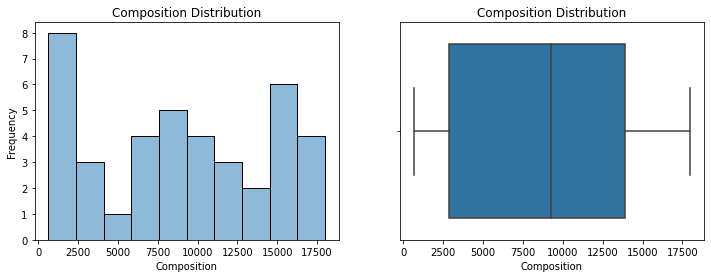

In [ ]:
plot_hist_box(comp, "Composition")

First, the mean 8950.68 and median 9230 values are relatively close together, which suggests that the distribution is roughly symmetric and not highly skewed in either direction. However, the fact that the mean is slightly higher than the median, the distribution might be slightly right-skewed.

Next, the large standard deviation of 5728.50 suggests that the Composition values are spread out over a wide range, which also supports the conclusion that the distribution is not highly skewed in either direction.

Finally, from the minimum and maximum values 641 and 17998, these values are significantly lower or higher than the rest of the data, respectively. It can be seen that there are no outliers present in the dataset.

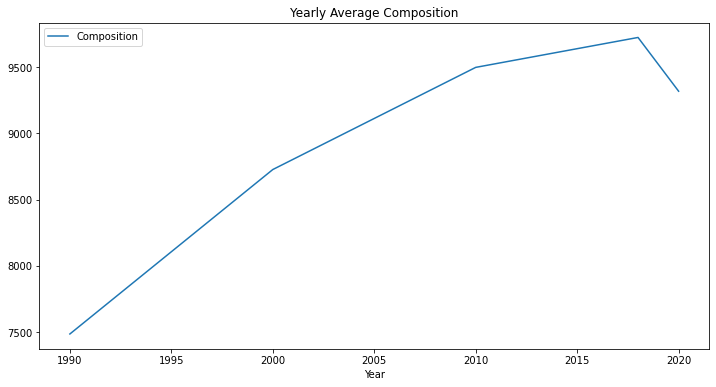

In [ ]:
comp.groupby("Year")["Composition"].mean().reset_index().plot(
    x="Year", 
    y="Composition", 
    figsize=(12,6), 
    title='Yearly Average Composition'
    )
plt.show()

In [ ]:
rates = pd.melt(rates, id_vars=["Age"], var_name="Year", value_name="Rates")
rates['Year'] = rates['Year'].astype(int)
rates['Race'] = "Total"
rates.head()

,Age,Year,Rates,Race
0,15-24,1990,16.9,Total
1,25-34,1990,46.4,Total
2,35-44,1990,67.4,Total
3,45-54,1990,76.3,Total
4,55-64,1990,80.6,Total


In [ ]:
rates.describe()

,Year,Rates
count,40.00000,40.000000
mean,2007.60000,61.872500
std,11.41479,21.109069
min,1990.00000,14.600000
25%,2000.00000,54.950000
50%,2010.00000,69.200000
75%,2018.00000,77.450000
max,2020.00000,81.300000


The mean of 61.87% indicates that the average home ownership rate in the dataset is around 61.87%. This suggests that the majority of the population in Illinois has a home ownership rate around this value.

The standard deviation of 21.11% indicates that the values in the dataset are spread out by around 21.11%. This means that there is a significant variation in the home ownership rates in the population of Illinois.

The minimum value of 14.6% and maximum value of 81.3% gives the range of the home ownership rate values in the dataset. It is clear that the home ownership rate values in the population of Illinois varies greatly, with some individuals having very low rates and some having very high rates.

The 25th percentile, 50th percentile and 75th percentile values of 54.95%, 69.2% and 77.45% respectively give the distribution of the data. It can be seen that 25% of the population has a home ownership rate of less than 54.95%, 50% of the population has a home ownership rate of less than 69.2% and 75% of the population has a home ownership rate of less than 77.45%. This indicates that there is a large proportion of the population that has a low home ownership rate, while a small proportion of the population has a high home ownership rate.

Overall, this dataset shows that the home ownership rate in the population of Illinois varies greatly and the majority of the population have a home ownership rate around 61.87%. These results provide valuable insights that can be used to understand the state of home ownership in Illinois and inform decisions.

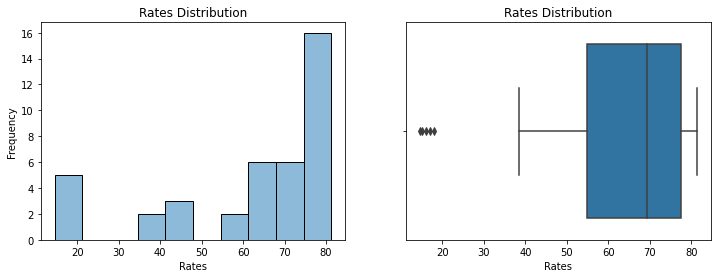

In [ ]:
plot_hist_box(rates, "Rates")

First, the mean 61.87 and median 69.2 values are relatively close together, which suggests that the distribution is roughly symmetric and not highly skewed in either direction. However, the fact that the mean is slightly lower than the median, the distribution might be slightly left-skewed.

Next, the large standard deviation of 21.11 suggests that the rates values are spread out over a wide range, which also supports the conclusion that the distribution is not highly skewed in either direction.

Finally, from the minimum and maximum values 14.6 and 81.3, it can be seen that there are some outliers present in the dataset. These values are significantly lower or higher than the rest of the data, respectively. 

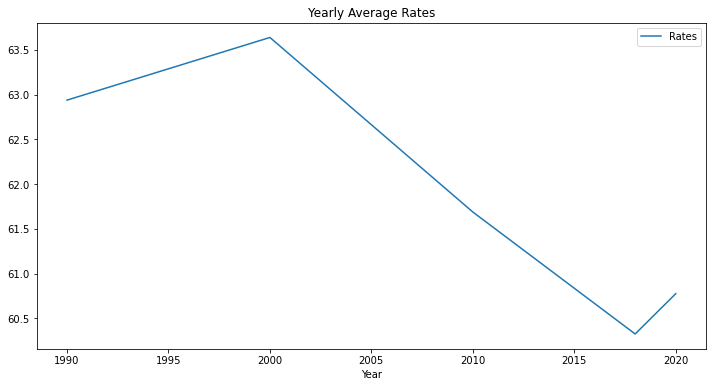

In [ ]:
rates.groupby("Year")["Rates"].mean().reset_index().plot(
    x="Year", 
    y="Rates", 
    figsize=(12,6), 
    title='Yearly Average Rates'
    )
plt.show()

In [ ]:
income_location.head()

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography
0,2020,2020,0,Total,42891,22191.0,"Census Tract 101, Cook County, IL",14000US17031010100
1,2020,2020,0,Total,39955,23269.0,"Census Tract 102.01, Cook County, IL",14000US17031010201
2,2020,2020,0,Total,43839,6338.0,"Census Tract 102.02, Cook County, IL",14000US17031010202
3,2020,2020,0,Total,44375,16139.0,"Census Tract 103, Cook County, IL",14000US17031010300
4,2020,2020,0,Total,37198,8616.0,"Census Tract 104, Cook County, IL",14000US17031010400


In [ ]:
income_location.describe()

,ID Year,Year,ID Race,Household Income by Race,Household Income by Race Moe
count,6380.000000,6380.000000,6380.0,6380.000000,6380.000000
mean,2016.488401,2016.488401,0.0,54301.682445,11364.113323
std,2.287330,2.287330,0.0,30291.825079,7297.017224
min,2013.000000,2013.000000,0.0,4145.000000,548.000000
25%,2014.000000,2014.000000,0.0,32266.750000,6488.500000
50%,2016.000000,2016.000000,0.0,45860.500000,9692.000000
75%,2018.000000,2018.000000,0.0,68902.000000,14135.250000
max,2020.000000,2020.000000,0.0,216667.000000,85934.000000


All the values in `ID Race` are zeros, so it will be removed from the dataset as it does not provide any meaningful information. `ID Year` and `Year` column contain the same values. So one will be dropped as well. All values in `ID Geography`are unique, so it provides little information as well.

In [ ]:
income_location.drop(columns=["ID Year","ID Race","ID Geography"], inplace=True, axis=1)

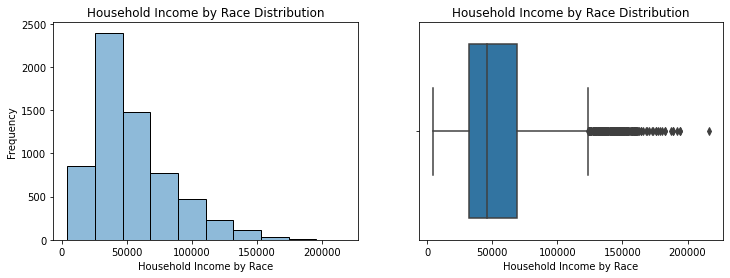

In [ ]:
plot_hist_box(income_location, "Household Income by Race")

The mean of `Household Income by Race` is $54,301.68, which indicates that the average household income by race in the dataset is around this value. This suggests that the majority of the households in Illinois have an income around this value.

The standard deviation of `Household Income by Race` is $30,291.83 which indicates that the values in the dataset are spread out by around this value. This means that there is a significant variation in the household incomes by race in the population of Illinois.

The minimum value of $4145 and maximum value of $216667 give the range of the household income by race values in the dataset. It is clear that the household income by race values in the population of Illinois varies greatly, with some households having very low income and some having very high income.

The 25th percentile, 50th percentile and 75th percentile values of $32266.75, $45860.50 and $68902.00 respectively give the distribution of the data. It can be seen that 25% of the households have a household income by race of less than $32266.75, 50% of the households have a household income by race of less than $45860.50 and 75% of the households have a household income by race of less than $68902.00. This indicates that there is a large proportion of the population that has a low household income by race, while a small proportion of the population has a high household income by race. There are a lot of outliers here which have to be handled before modelling.

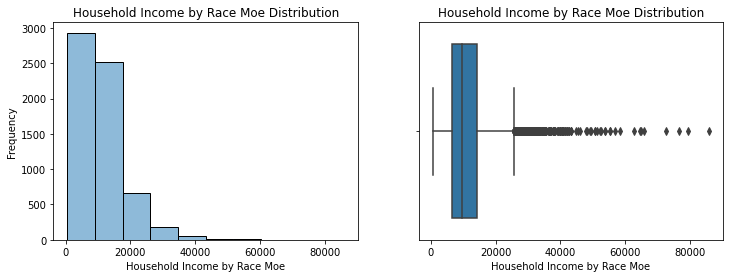

In [ ]:
plot_hist_box(income_location, "Household Income by Race Moe")

 `Household Income by Race Moe` represents the margin of error for the `Household Income by Race` variable. It measures the degree of uncertainty or variability in the estimate of the mean household income by race. The mean of "Household Income by Race Moe" is $11364.11, which indicates that on average, the margin of error for the estimate of the mean household income by race is around $11364.11.

The standard deviation of `Household Income by Race Moe` is $7297.02 which indicates that the degree of uncertainty or variability in the estimate of the mean household income by race is widely spread out. The minimum value of $548.00 and maximum value of $85934.00 gives the range of the margin of error for the estimate of the mean household income by race in the dataset. It is clear that the margin of error for the estimate of the mean household income by race in the population of Illinois varies greatly, with some individuals having very low margin of error and some having very high margin of error.

The 25th percentile, 50th percentile and 75th percentile values of $6488.50, $9692.00 and $14135.25 respectively give the distribution of the data. It can be seen that 25% of the population has a margin of error of less than $6488.50, 50% of the population has a margin of error of less than $9692.00 and 75% of the population has a margin of error of less than $14135.25. This indicates that there is a large proportion of the population that has a low margin of error, while a small proportion of the population has a high margin of error.

Overall, this dataset shows that the margin of error for the estimate of the mean household income by race in the population of Illinois varies greatly and the majority of the population have a margin of error around $11364.11. This distibution also contains a lot of outliers that need to be handled before carrying out further analysis.

In [ ]:
income_count_year = income_location["Year"].value_counts().reset_index().rename(columns={"index":"Year", "Year":"Count"})
income_count_year

,Year,Count
0,2018,801
1,2014,801
2,2013,801
3,2019,800
4,2015,800
5,2017,799
6,2016,798
7,2020,780


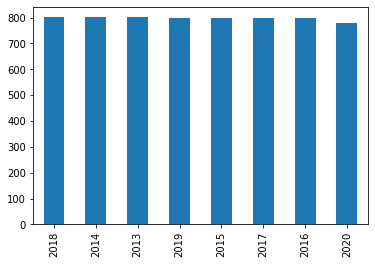

In [ ]:
income_location["Year"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
income_location.describe().iloc[:,-2:] 

,Household Income by Race,Household Income by Race Moe
count,6380.000000,6380.000000
mean,54301.682445,11364.113323
std,30291.825079,7297.017224
min,4145.000000,548.000000
25%,32266.750000,6488.500000
50%,45860.500000,9692.000000
75%,68902.000000,14135.250000
max,216667.000000,85934.000000


In [ ]:
income_location["Census Tract"] = income_location["Geography"].str.split(",", expand=True)[0]
income_location["County"] = income_location["Geography"].str.split(",", expand=True)[1]
income_location["State"] = income_location["Geography"].str.split(",", expand=True)[2]

In [ ]:
income_location.head()

,Year,Race,Household Income by Race,Household Income by Race Moe,Geography,Census Tract,County,State
0,2020,Total,42891,22191.0,"Census Tract 101, Cook County, IL",Census Tract 101,Cook County,IL
1,2020,Total,39955,23269.0,"Census Tract 102.01, Cook County, IL",Census Tract 102.01,Cook County,IL
2,2020,Total,43839,6338.0,"Census Tract 102.02, Cook County, IL",Census Tract 102.02,Cook County,IL
3,2020,Total,44375,16139.0,"Census Tract 103, Cook County, IL",Census Tract 103,Cook County,IL
4,2020,Total,37198,8616.0,"Census Tract 104, Cook County, IL",Census Tract 104,Cook County,IL


In [ ]:
for col in ["Race", "County", "State"]:
    print("========================================")
    print(f"{col}")
    print("========================================")
    print(f"{income_location[col].value_counts()}")
    print("========================================")

Race
Total    6380
Name: Race, dtype: int64
County
 Cook County      6364
 DuPage County      16
Name: County, dtype: int64
State
 IL    6380
Name: State, dtype: int64


## All

In [ ]:
def transform(file, value):
    # list of sheet names or indexes
    sheets = ['WHITE', 'BLACK', 'HISPANIC', 'ASIAN AND OTHER']

    # empty list to store dataframes
    data = []

    for sheet in sheets:
        df = pd.read_excel(file, sheet_name=sheet, header=1)
        df = pd.melt(df, id_vars=["Age"], var_name="Year", value_name=value)
        df['Year'] = df['Year'].astype(int)
        df['Race'] = sheet
        data.append(df)

    return pd.concat(data)

    # data is a list of dataframes, one for each sheet

In [ ]:
all_composition = transform('HomeownerComp_Age_Race_Ethnicity.xlsx', 'Composition')

In [ ]:
all_composition.head()

,Age,Year,Composition,Race
0,15-24,1990,682,WHITE
1,25-34,1990,7911,WHITE
2,35-44,1990,11556,WHITE
3,45-54,1990,9241,WHITE
4,55-64,1990,8563,WHITE


In [ ]:
all_composition["Race"].value_counts()

WHITE              40
BLACK              40
HISPANIC           40
ASIAN AND OTHER    40
Name: Race, dtype: int64

In [ ]:
data = all_composition.groupby(['Year','Race'])['Composition'].mean().reset_index()
data

,Year,Race,Composition
0,1990,ASIAN AND OTHER,174.250
1,1990,BLACK,549.375
2,1990,HISPANIC,317.250
3,1990,WHITE,6444.375
4,2000,ASIAN AND OTHER,354.875
5,2000,BLACK,682.875
6,2000,HISPANIC,526.625
7,2000,WHITE,6912.500
8,2010,ASIAN AND OTHER,505.375
9,2010,BLACK,693.000


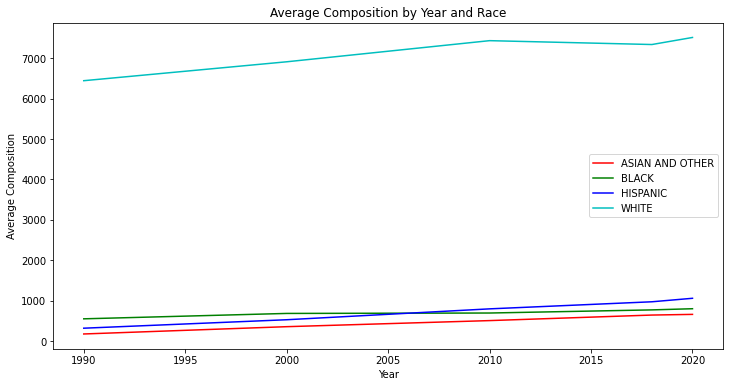

In [ ]:
plt.figure(figsize=(12,6))

colors = {'ASIAN AND OTHER': 'r', 'BLACK': 'g', 'HISPANIC': 'b', 'WHITE': 'c'}

for race, color in colors.items():
    df_race = data[data['Race'] == race]
    
    plt.plot(df_race['Year'], df_race['Composition'], color=color, label=race)

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Average Composition')
plt.title('Average Composition by Year and Race')
plt.legend()
plt.show()

In [ ]:
all_rates = transform('HomeownershipRates_Age_Race_Ethnicity.xlsx', 'Rates')

In [ ]:
all_rates.head()

,Age,Year,Rates,Race
0,15-24,1990,19.2,WHITE
1,25-34,1990,52.2,WHITE
2,35-44,1990,73.0,WHITE
3,45-54,1990,80.9,WHITE
4,55-64,1990,84.3,WHITE


In [ ]:
all_rates["Race"].value_counts()

WHITE              40
BLACK              40
HISPANIC           40
ASIAN AND OTHER    40
Name: Race, dtype: int64

In [ ]:
results = all_rates.groupby(['Year','Race'])['Rates'].mean().reset_index()
results

,Year,Race,Rates
0,1990,ASIAN AND OTHER,53.5375
1,1990,BLACK,48.0375
2,1990,HISPANIC,47.1625
3,1990,WHITE,66.2625
4,2000,ASIAN AND OTHER,53.4750
5,2000,BLACK,48.9000
6,2000,HISPANIC,49.5500
7,2000,WHITE,67.7625
8,2010,ASIAN AND OTHER,54.7375
9,2010,BLACK,45.8750


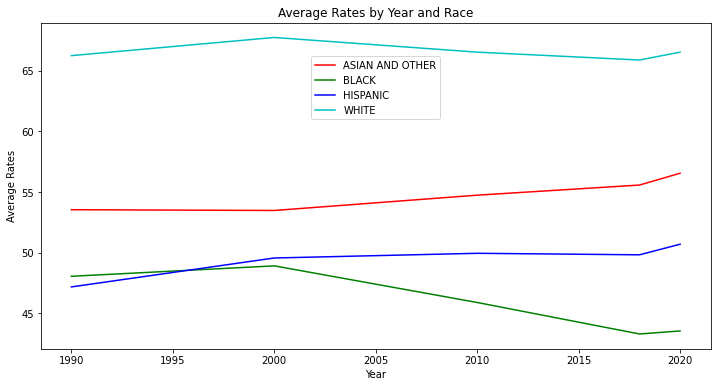

In [ ]:
plt.figure(figsize=(12,6))

colors = {'ASIAN AND OTHER': 'r', 'BLACK': 'g', 'HISPANIC': 'b', 'WHITE': 'c'}

for race, color in colors.items():
    df_race = results[results['Race'] == race]
    
    plt.plot(df_race['Year'], df_race['Rates'], color=color, label=race)

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Average Rates')
plt.title('Average Rates by Year and Race')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='center', ncol=1)
plt.show()